In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sales_df = pd.read_csv('fct_invoice.csv')

sales_df

,invoice_no,customer_id,category,quantity,price,payment_method,invoice_date,shopping_mall
0,I138884,229,Clothing,5,1500.40,Credit Card,5/8/2022,Kanyon
1,I317333,3433,Shoes,3,1800.51,Debit Card,12/12/2021,Forum Istanbul
2,I127801,644,Clothing,1,300.08,Cash,9/11/2021,Metrocity
3,I173702,4900,Shoes,5,3000.85,Credit Card,16/05/2021,Metropol AVM
4,I337046,1089,Books,4,60.60,Cash,24/10/2021,Kanyon
...,...,...,...,...,...,...,...,...
99452,I219422,2344,Souvenir,5,58.65,Credit Card,21/09/2022,Kanyon
99453,I325143,172,Food & Beverage,2,10.46,Cash,22/09/2021,Forum Istanbul
99454,I824010,425,Food & Beverage,2,10.46,Debit Card,28/03/2021,Metrocity
99455,I702964,577,Technology,4,4200.00,Cash,16/03/2021,Istinye Park


In [3]:
customer_df = pd.read_json('dim_customer.json')

customer_df

,age,first_name,gender,id,last_name
0,48.0,Nicholas,M,0,Flores
1,NaN,Jeffery,M,1,Rowe
2,57.0,Alexis,F,2,Benton
3,73.0,Amy,F,3,Johnson
4,20.0,David,M,4,Moore
...,...,...,...,...,...
5186,NaN,Arthur,M,9428,Harris
5187,NaN,David,M,9494,Roy
5188,85.0,Thomas,M,10350,Turner
5189,NaN,April,F,10587,Sanchez


# Easy 

1. How many unique customers are in the dataset?

In [4]:
customer_count = customer_df['id'].nunique()

print("Number of unique customers in the dataset:", customer_count)

Number of unique customers in the dataset: 5191


2. What are the different categories of products available? How many unique categories are there?

In [5]:
count_product_category = sales_df['category'].nunique()
product_category = sales_df['category'].unique()

print("Number of product categories:", count_product_category)
print("Categories:", product_category)

Number of product categories: 8
Categories: ['Clothing' 'Shoes' 'Books' 'Cosmetics' 'Food & Beverage' 'Toys'
 'Technology' 'Souvenir']


3. Which payment method is the most popular how many times was it used? 

In [6]:
payment_methods = sales_df['payment_method'].value_counts()

cash_usage_pm = payment_methods.get('Cash', 0)
dc_usage_pm = payment_methods.get('Debit Card', 0)
cc_usage_pm = payment_methods.get('Credit Card', 0)

usage_count = max(cash_usage_pm, dc_usage_pm, cc_usage_pm)
pop_pm = payment_methods.idxmax()

print("The most used payment method is", pop_pm)
print(pop_pm, "was used", usage_count, "times")

The most used payment method is Cash
Cash was used 44447 times


# Medium

1. What are the three most popular categories, by total sales?

In [7]:
sales_df['total_sales'] = sales_df['quantity'] * sales_df['price']
pop_cat = sales_df.groupby(['category']).sum()
ranked = pop_cat.sort_values("total_sales", ascending = False)
ranked_ver = ranked['total_sales']

print("the most popular categories by total sales are shown below:", "\n \n", ranked_ver[0:3])

the most popular categories by total sales are shown below: 
 
 category
Clothing      1.139968e+08
Shoes         6.655345e+07
Technology    5.786235e+07
Name: total_sales, dtype: float64


/var/folders/p1/swdxw73j7plbqnbtgc35wmgc0000gn/T/ipykernel_9525/3292196667.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pop_cat = sales_df.groupby(['category']).sum()


2. What are the total sales attributed to customers over the age of 45?

In [8]:
merged_df = pd.merge(sales_df, customer_df, left_on="customer_id", right_on="id")

filtered_df = merged_df.loc[(merged_df['age'] > 45)]
sales_contribution = filtered_df['total_sales'].sum()

print("Customers over the age of 45 contributed", sales_contribution, "to the total sales")

Customers over the age of 45 contributed 82039768.15 to the total sales


3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)

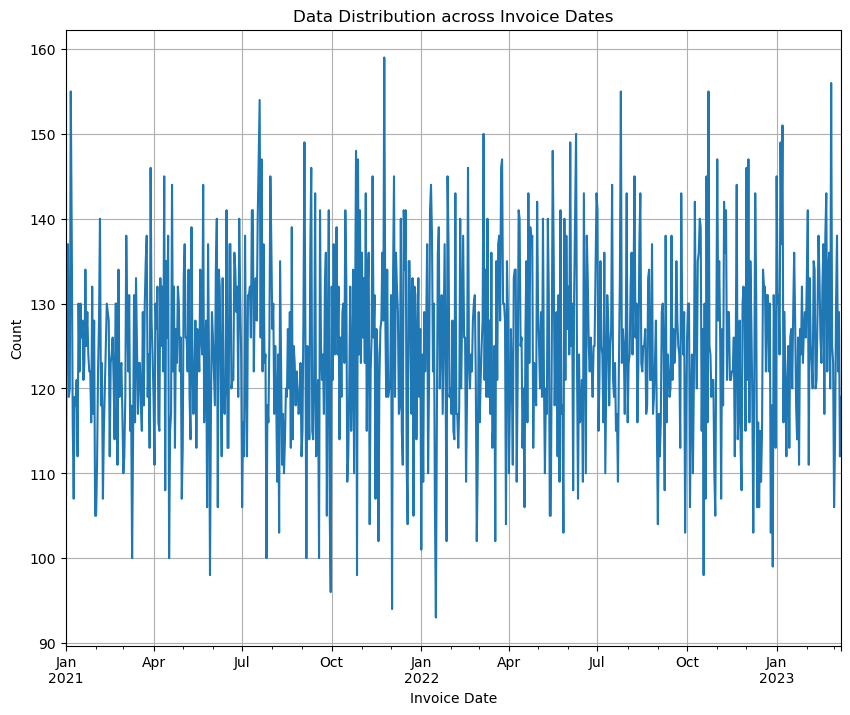

In [40]:
new_sales_df = sales_df.drop(columns = ['invoice_no','customer_id','category','quantity','price','payment_method','shopping_mall'])

new_sales_df['invoice_date'] = pd.to_datetime(sales_df['invoice_date'], format='%d/%m/%Y')

sales_counts = new_sales_df['invoice_date'].value_counts().sort_index()


plt.figure(figsize=(10, 8))
sales_counts.plot(kind='line')

plt.title('Data Distribution across Invoice Dates')
plt.xlabel('Invoice Date')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The graph shows a steady total sales record, avaraging from 120 to 130k monthly. 

On seasonal trends, it can be noticed that there are higher sales from late June to July and November to December.

# Hard

1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range (e.g., 10-19, 20-29, and so forth).

In [52]:
import numpy as np 

merged_df['decade_age_range'] = pd.cut(merged_df['age'], bins=[0, 9, 19, 29, 39, 49, 59, 69, 79, 89, 99], labels=['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-99'])

pivot_table = pd.pivot_table(merged_df, values='total_sales', index='category', columns='decade_age_range', aggfunc=np.sum)

pivot_table

decade_age_range,0-9,10-19,20-29,30-39,40-49,50-59,60-69,70-79,80-89,90-99
category,,,,,,,,,,
Books,0.0,12801.75,79461.75,84143.10,87203.40,74962.20,80476.80,54827.85,26664.00,0.0
Clothing,0.0,1927413.84,10250732.80,11354126.96,11215189.92,10321851.76,10660642.08,7769371.28,4493698.00,0.0
Cosmetics,0.0,109619.36,605915.32,723544.70,665034.96,587780.96,649990.76,419082.62,254531.60,0.0
Food & Beverage,0.0,13582.31,73491.96,87246.86,89553.29,72425.04,80976.09,55050.98,31332.93,0.0
Shoes,0.0,993281.35,5924878.24,7200839.66,7025590.02,5852857.84,5978893.54,4480269.05,2628744.60,0.0
Souvenir,0.0,12375.15,54943.32,64092.72,66391.80,54943.32,55025.43,38673.81,23718.06,0.0
Technology,0.0,1129800.00,5261550.00,6159300.00,5954550.00,4435200.00,5471550.00,3638250.00,1946700.00,0.0
Toys,0.0,60426.24,385100.80,420582.40,390906.88,345067.52,363955.20,273244.16,153932.80,0.0
